# Integrate-and-Fire (single neuron)

Install required packages:

In [4]:
import numpy as np
import pylab as pl
from matplotlib import gridspec

Initialize parameters:

In [5]:
# timesteps
dt = 0.01 
iterations = 600
x = np.arange(0, iterations) * dt

# external input (mA)
I = 20
I_der = 0
c = I + I_der

# threshold (mV)
T = -63

# constants
gamma = 8

# array containing voltages 
voltages = np.zeros(iterations)

# starting voltage
voltages[0] = -80

# array containing spike times
spikes = np.zeros(iterations)

# array containing current
I_t = np.ones(iterations) * I

# array containing current estimate
Ihat_t = np.zeros(iterations)

# array containing spike train o(t)
o_t = np.zeros(iterations)

Run simulation:

In [6]:
for i in range(1, iterations):

    # update current estimate
    dIdt = - Ihat_t[i - 1] + gamma * o_t[i - 1]
    Ihat_t[i] = Ihat_t[i - 1] + dt * dIdt
    
    # update voltage
    dVdt = -voltages[i - 1] + gamma * c - gamma**2 * o_t[i - 1]
    voltages[i] = voltages[i - 1] + dt * dVdt
    
    # reset voltage when reaching threshold
    if voltages[i] > T:
        
        # update o(t)
        o_t[i] = 1 / dt
        
        # update voltage and spikes 
        voltages[i] = voltages[i] - gamma * o_t[i]
        spikes[i] = 1

Plot results:

Text(0.5,0,'time')

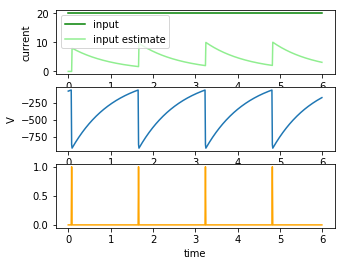

In [7]:
pl.subplots(3, 1, figsize=(5,4))

# plot input and input estimate
pl.subplot(3, 1, 1)
pl.plot(x, I_t, color='green',label='input')
pl.plot(x, Ihat_t, color='lightgreen',label='input estimate')
pl.legend()
pl.ylabel('current')

# plot voltage and spike times
pl.subplot(3, 1, 2)
pl.plot(x, voltages,label='voltage')
pl.ylabel('V')

pl.subplot(3, 1, 3)
pl.plot(x, spikes,label='spikes',color='orange')
pl.xlabel('time')